In [13]:
import os
import pickle
from collections import defaultdict, OrderedDict

import networkx as nx
import nxviz as nv
import pandas as pd

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import os

path_map = list()
for directory in os.listdir('./combined_graphs/'):
    for file in os.listdir('./combined_graphs/' + directory + '/'):
        poem_ind = file.split('.')[0]
        path_map.append((directory, poem_ind))

In [3]:
path_map[0]

('0', '1')

In [4]:
path_map_length = len(path_map)

similarity_scores = list()
for ind, (p1_ind, p2_ind) in enumerate(path_map):
    if ind % 10 == 0:
        print(f"{ind} -- {round((ind / path_map_length) * 100, 2)}%")
    
    subgraph = nx.read_gpickle(f"./combined_graphs/{p1_ind}/{p2_ind}.gpickle")
    
    BASE_P1_IND = int(p1_ind)
    BASE_P2_IND = int(p2_ind)
    
    similarity_score = 0
    
    base_p1_nodes_data = [(node, data) for node, data in subgraph.nodes(data=True) if data['doc_id'] == BASE_P1_IND]
    
    same_term_scores = 0
    same_term_lengh = 0
    # Add both tf-idf of P1Nn and P2Nn if they are the same words across poems, no synonyms
    for p1_node, data in base_p1_nodes_data:
        # This should only ever result in either 0 or 1 nodes
        p2_neighbors_tf_idf = [
            subgraph.node[n]['tf_idf'] for n in subgraph.neighbors(p1_node) 
            if subgraph.node[n]['doc_id'] == BASE_P2_IND
        ]

        # if it is a one-to-one relationship
        if p2_neighbors_tf_idf:
            same_term_lengh += 1
            
            same_term_scores += data['tf_idf']

            for tf_idf in p2_neighbors_tf_idf:
                same_term_scores += tf_idf
                
    if same_term_scores:
        similarity_score += (same_term_scores / same_term_lengh)

    # Calculate scores for nodes that have synonym relationships
    for p1_node, p1_data in base_p1_nodes_data:
        # for all syns.. *denoted by -1
        for syn_node in [s_n for s_n in subgraph.neighbors(p1_node) if subgraph.node[s_n]['doc_id'] == -1]:
            # all neighbors of syn matching P1Tn where neighbor is not in P1
            syn_p2_neighbors = [n for n in subgraph.neighbors(syn_node) if subgraph.node[n]['doc_id'] != BASE_P1_IND]

            p2_syn_scores = 0
            # for all P2 nodes associated with the syn..
            for p2_node in syn_p2_neighbors:
                p2_syn_scores += (p1_data['tf_idf'] + subgraph.node[p2_node]['tf_idf'])

            similarity_score += (p2_syn_scores / (len(syn_p2_neighbors) * 2))
            
    try:
        similarity_score = similarity_score / len(subgraph.nodes())
    except ZeroDivisionError:
        similarity_score = 0
            
    # Tack on the scores for this combination
    similarity_scores.append((p1_ind, p2_ind, similarity_score))
    
print('Done')

0 -- 0.0%
10 -- 0.03%
20 -- 0.07%
30 -- 0.1%
40 -- 0.13%
50 -- 0.17%
60 -- 0.2%
70 -- 0.23%
80 -- 0.27%
90 -- 0.3%
100 -- 0.33%
110 -- 0.37%
120 -- 0.4%
130 -- 0.43%
140 -- 0.46%
150 -- 0.5%
160 -- 0.53%
170 -- 0.56%
180 -- 0.6%
190 -- 0.63%
200 -- 0.66%
210 -- 0.7%
220 -- 0.73%
230 -- 0.76%
240 -- 0.8%
250 -- 0.83%
260 -- 0.86%
270 -- 0.9%
280 -- 0.93%
290 -- 0.96%
300 -- 1.0%
310 -- 1.03%
320 -- 1.06%
330 -- 1.1%
340 -- 1.13%
350 -- 1.16%
360 -- 1.19%
370 -- 1.23%
380 -- 1.26%
390 -- 1.29%
400 -- 1.33%
410 -- 1.36%
420 -- 1.39%
430 -- 1.43%
440 -- 1.46%
450 -- 1.49%
460 -- 1.53%
470 -- 1.56%
480 -- 1.59%
490 -- 1.63%
500 -- 1.66%
510 -- 1.69%
520 -- 1.73%
530 -- 1.76%
540 -- 1.79%
550 -- 1.83%
560 -- 1.86%
570 -- 1.89%
580 -- 1.92%
590 -- 1.96%
600 -- 1.99%
610 -- 2.02%
620 -- 2.06%
630 -- 2.09%
640 -- 2.12%
650 -- 2.16%
660 -- 2.19%
670 -- 2.22%
680 -- 2.26%
690 -- 2.29%
700 -- 2.32%
710 -- 2.36%
720 -- 2.39%
730 -- 2.42%
740 -- 2.46%
750 -- 2.49%
760 -- 2.52%
770 -- 2.56%
780 -- 2.

5820 -- 19.31%
5830 -- 19.35%
5840 -- 19.38%
5850 -- 19.41%
5860 -- 19.45%
5870 -- 19.48%
5880 -- 19.51%
5890 -- 19.55%
5900 -- 19.58%
5910 -- 19.61%
5920 -- 19.64%
5930 -- 19.68%
5940 -- 19.71%
5950 -- 19.74%
5960 -- 19.78%
5970 -- 19.81%
5980 -- 19.84%
5990 -- 19.88%
6000 -- 19.91%
6010 -- 19.94%
6020 -- 19.98%
6030 -- 20.01%
6040 -- 20.04%
6050 -- 20.08%
6060 -- 20.11%
6070 -- 20.14%
6080 -- 20.18%
6090 -- 20.21%
6100 -- 20.24%
6110 -- 20.28%
6120 -- 20.31%
6130 -- 20.34%
6140 -- 20.37%
6150 -- 20.41%
6160 -- 20.44%
6170 -- 20.47%
6180 -- 20.51%
6190 -- 20.54%
6200 -- 20.57%
6210 -- 20.61%
6220 -- 20.64%
6230 -- 20.67%
6240 -- 20.71%
6250 -- 20.74%
6260 -- 20.77%
6270 -- 20.81%
6280 -- 20.84%
6290 -- 20.87%
6300 -- 20.91%
6310 -- 20.94%
6320 -- 20.97%
6330 -- 21.01%
6340 -- 21.04%
6350 -- 21.07%
6360 -- 21.11%
6370 -- 21.14%
6380 -- 21.17%
6390 -- 21.2%
6400 -- 21.24%
6410 -- 21.27%
6420 -- 21.3%
6430 -- 21.34%
6440 -- 21.37%
6450 -- 21.4%
6460 -- 21.44%
6470 -- 21.47%
6480 -- 21.5%

11340 -- 37.63%
11350 -- 37.66%
11360 -- 37.7%
11370 -- 37.73%
11380 -- 37.76%
11390 -- 37.8%
11400 -- 37.83%
11410 -- 37.86%
11420 -- 37.9%
11430 -- 37.93%
11440 -- 37.96%
11450 -- 38.0%
11460 -- 38.03%
11470 -- 38.06%
11480 -- 38.1%
11490 -- 38.13%
11500 -- 38.16%
11510 -- 38.19%
11520 -- 38.23%
11530 -- 38.26%
11540 -- 38.29%
11550 -- 38.33%
11560 -- 38.36%
11570 -- 38.39%
11580 -- 38.43%
11590 -- 38.46%
11600 -- 38.49%
11610 -- 38.53%
11620 -- 38.56%
11630 -- 38.59%
11640 -- 38.63%
11650 -- 38.66%
11660 -- 38.69%
11670 -- 38.73%
11680 -- 38.76%
11690 -- 38.79%
11700 -- 38.83%
11710 -- 38.86%
11720 -- 38.89%
11730 -- 38.92%
11740 -- 38.96%
11750 -- 38.99%
11760 -- 39.02%
11770 -- 39.06%
11780 -- 39.09%
11790 -- 39.12%
11800 -- 39.16%
11810 -- 39.19%
11820 -- 39.22%
11830 -- 39.26%
11840 -- 39.29%
11850 -- 39.32%
11860 -- 39.36%
11870 -- 39.39%
11880 -- 39.42%
11890 -- 39.46%
11900 -- 39.49%
11910 -- 39.52%
11920 -- 39.56%
11930 -- 39.59%
11940 -- 39.62%
11950 -- 39.65%
11960 -- 39.6

16740 -- 55.55%
16750 -- 55.58%
16760 -- 55.62%
16770 -- 55.65%
16780 -- 55.68%
16790 -- 55.72%
16800 -- 55.75%
16810 -- 55.78%
16820 -- 55.82%
16830 -- 55.85%
16840 -- 55.88%
16850 -- 55.92%
16860 -- 55.95%
16870 -- 55.98%
16880 -- 56.01%
16890 -- 56.05%
16900 -- 56.08%
16910 -- 56.11%
16920 -- 56.15%
16930 -- 56.18%
16940 -- 56.21%
16950 -- 56.25%
16960 -- 56.28%
16970 -- 56.31%
16980 -- 56.35%
16990 -- 56.38%
17000 -- 56.41%
17010 -- 56.45%
17020 -- 56.48%
17030 -- 56.51%
17040 -- 56.55%
17050 -- 56.58%
17060 -- 56.61%
17070 -- 56.65%
17080 -- 56.68%
17090 -- 56.71%
17100 -- 56.74%
17110 -- 56.78%
17120 -- 56.81%
17130 -- 56.84%
17140 -- 56.88%
17150 -- 56.91%
17160 -- 56.94%
17170 -- 56.98%
17180 -- 57.01%
17190 -- 57.04%
17200 -- 57.08%
17210 -- 57.11%
17220 -- 57.14%
17230 -- 57.18%
17240 -- 57.21%
17250 -- 57.24%
17260 -- 57.28%
17270 -- 57.31%
17280 -- 57.34%
17290 -- 57.38%
17300 -- 57.41%
17310 -- 57.44%
17320 -- 57.47%
17330 -- 57.51%
17340 -- 57.54%
17350 -- 57.57%
17360 --

22150 -- 73.5%
22160 -- 73.54%
22170 -- 73.57%
22180 -- 73.6%
22190 -- 73.64%
22200 -- 73.67%
22210 -- 73.7%
22220 -- 73.73%
22230 -- 73.77%
22240 -- 73.8%
22250 -- 73.83%
22260 -- 73.87%
22270 -- 73.9%
22280 -- 73.93%
22290 -- 73.97%
22300 -- 74.0%
22310 -- 74.03%
22320 -- 74.07%
22330 -- 74.1%
22340 -- 74.13%
22350 -- 74.17%
22360 -- 74.2%
22370 -- 74.23%
22380 -- 74.27%
22390 -- 74.3%
22400 -- 74.33%
22410 -- 74.37%
22420 -- 74.4%
22430 -- 74.43%
22440 -- 74.46%
22450 -- 74.5%
22460 -- 74.53%
22470 -- 74.56%
22480 -- 74.6%
22490 -- 74.63%
22500 -- 74.66%
22510 -- 74.7%
22520 -- 74.73%
22530 -- 74.76%
22540 -- 74.8%
22550 -- 74.83%
22560 -- 74.86%
22570 -- 74.9%
22580 -- 74.93%
22590 -- 74.96%
22600 -- 75.0%
22610 -- 75.03%
22620 -- 75.06%
22630 -- 75.1%
22640 -- 75.13%
22650 -- 75.16%
22660 -- 75.19%
22670 -- 75.23%
22680 -- 75.26%
22690 -- 75.29%
22700 -- 75.33%
22710 -- 75.36%
22720 -- 75.39%
22730 -- 75.43%
22740 -- 75.46%
22750 -- 75.49%
22760 -- 75.53%
22770 -- 75.56%
22780 -- 

27370 -- 90.82%
27380 -- 90.86%
27390 -- 90.89%
27400 -- 90.92%
27410 -- 90.96%
27420 -- 90.99%
27430 -- 91.02%
27440 -- 91.06%
27450 -- 91.09%
27460 -- 91.12%
27470 -- 91.16%
27480 -- 91.19%
27490 -- 91.22%
27500 -- 91.26%
27510 -- 91.29%
27520 -- 91.32%
27530 -- 91.36%
27540 -- 91.39%
27550 -- 91.42%
27560 -- 91.46%
27570 -- 91.49%
27580 -- 91.52%
27590 -- 91.55%
27600 -- 91.59%
27610 -- 91.62%
27620 -- 91.65%
27630 -- 91.69%
27640 -- 91.72%
27650 -- 91.75%
27660 -- 91.79%
27670 -- 91.82%
27680 -- 91.85%
27690 -- 91.89%
27700 -- 91.92%
27710 -- 91.95%
27720 -- 91.99%
27730 -- 92.02%
27740 -- 92.05%
27750 -- 92.09%
27760 -- 92.12%
27770 -- 92.15%
27780 -- 92.19%
27790 -- 92.22%
27800 -- 92.25%
27810 -- 92.28%
27820 -- 92.32%
27830 -- 92.35%
27840 -- 92.38%
27850 -- 92.42%
27860 -- 92.45%
27870 -- 92.48%
27880 -- 92.52%
27890 -- 92.55%
27900 -- 92.58%
27910 -- 92.62%
27920 -- 92.65%
27930 -- 92.68%
27940 -- 92.72%
27950 -- 92.75%
27960 -- 92.78%
27970 -- 92.82%
27980 -- 92.85%
27990 --

In [5]:
# now to actually create the matrix
similarities_map = defaultdict(dict)
max_score = 0

# baseline for the matrix
for p1, p2, similarity_score in similarity_scores:
    similarities_map[p1][p2] = similarity_score
    similarities_map[p2][p1] = similarity_score
    
    max_score = similarity_score if similarity_score > max_score else max_score
        
    
# establish identity
for i in range(len(similarities_map)):
    similarities_map[str(i)][str(i)] = 0

In [6]:
max_score

0.4178186936258054

In [7]:
assert len(similarities_map) == 246
for i in range(246):
    assert len(similarities_map[str(i)]) == 246

In [8]:
similarities_matrix = pd.DataFrame(
    {str(i): [similarities_map[str(i)][str(j)] / max_score for j in range(len(similarities_map[str(i)]))] 
     for i in range(len(similarities_map))}
)

In [9]:
similarities_matrix.head(10)

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,0.000000,0.123463,0.066689,0.055444,0.076449,0.041863,0.044225,0.100720,0.048032,0.096424,...,0.080561,0.063746,0.058949,0.069276,0.053847,0.043483,0.047542,0.047010,0.031865,0.029624
1,0.123463,0.000000,0.125699,0.126394,0.092586,0.115756,0.095119,0.073074,0.030708,0.199812,...,0.146117,0.145017,0.161594,0.216355,0.121628,0.099754,0.083761,0.104546,0.073736,0.069029
2,0.066689,0.125699,0.000000,0.090144,0.083767,0.094484,0.087930,0.065035,0.075319,0.143984,...,0.135442,0.135802,0.105061,0.095186,0.079490,0.062654,0.074099,0.062974,0.059700,0.062276
3,0.055444,0.126394,0.090144,0.000000,0.104553,0.105841,0.118191,0.074898,0.087236,0.222916,...,0.116332,0.111904,0.108159,0.167393,0.103446,0.056762,0.098412,0.073456,0.068670,0.058650
4,0.076449,0.092586,0.083767,0.104553,0.000000,0.077919,0.085748,0.129260,0.082086,0.101623,...,0.114092,0.094877,0.072699,0.078304,0.116719,0.081287,0.078874,0.051996,0.055871,0.047031
5,0.041863,0.115756,0.094484,0.105841,0.077919,0.000000,0.164376,0.088369,0.032308,0.126959,...,0.167248,0.144997,0.099619,0.101719,0.130449,0.091542,0.081610,0.104703,0.041097,0.066719
6,0.044225,0.095119,0.087930,0.118191,0.085748,0.164376,0.000000,0.116004,0.149351,0.160957,...,0.134822,0.107001,0.162040,0.153442,0.090668,0.143162,0.159509,0.091841,0.056159,0.080850
7,0.100720,0.073074,0.065035,0.074898,0.129260,0.088369,0.116004,0.000000,0.062287,0.089922,...,0.080225,0.069783,0.097934,0.115674,0.081094,0.104775,0.094619,0.090395,0.084303,0.081179
8,0.048032,0.030708,0.075319,0.087236,0.082086,0.032308,0.149351,0.062287,0.000000,0.080014,...,0.103230,0.162331,0.162808,0.054646,0.042692,0.038371,0.110053,0.051223,0.067001,0.060906
9,0.096424,0.199812,0.143984,0.222916,0.101623,0.126959,0.160957,0.089922,0.080014,0.000000,...,0.095544,0.122924,0.223191,0.172503,0.149057,0.104306,0.080630,0.100480,0.053259,0.062847


In [10]:
# Get the top 3 scores from each row
n_largest = dict()
for i in range(len(similarities_matrix)):
    str_ind = str(i)
    
    top_3_vals = similarities_matrix.nlargest(3, str_ind).loc[:, str_ind].tolist()
    top_3_index = similarities_matrix.nlargest(3, str_ind).loc[:, str_ind].index.tolist()
    
    n_largest[str_ind] = list(zip(top_3_vals, top_3_index))

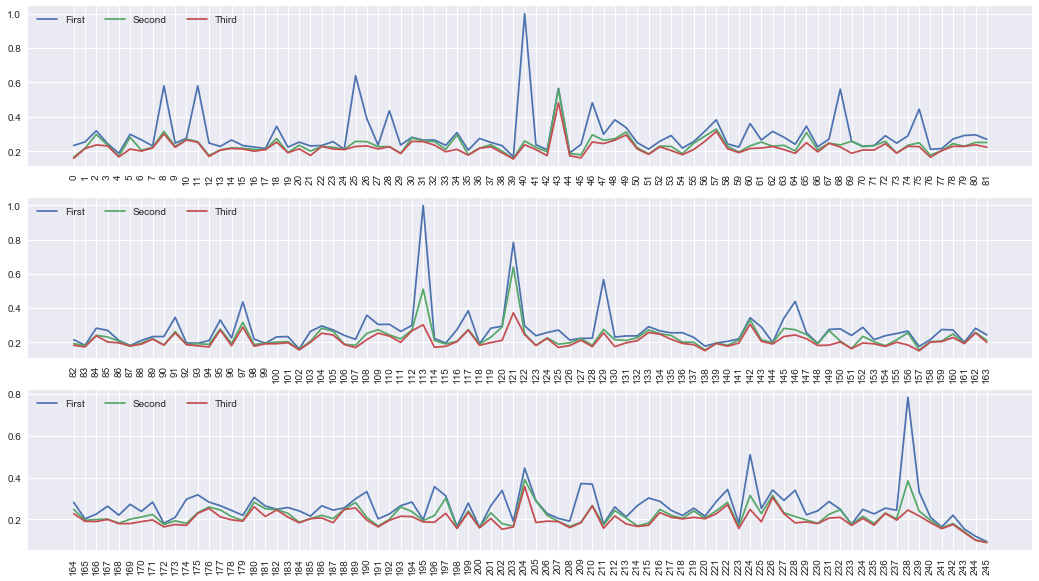

In [11]:
import seaborn as sns

sns.set()

scores = []
for n_set in n_largest.values():
    scores.append([score for score, ind in n_set])

n_largest_keys = list(n_largest.keys())

f = plt.figure(figsize=(18, 10))

base = 82
for i in range(3):
    ax = f.add_subplot(3, 1, i + 1)
    
    plt.plot(n_largest_keys[base*i:base*(i+1)], scores[base*i:base*(i+1)])
    plt.legend(['First', 'Second', 'Third'], ncol=3, loc='upper left');
    plt.xticks(rotation=90)
    
plt.show();

In [15]:
n_largest['180']

[(0.30480436374588665, 142),
 (0.2818490386836921, 30),
 (0.26029939697897125, 40)]

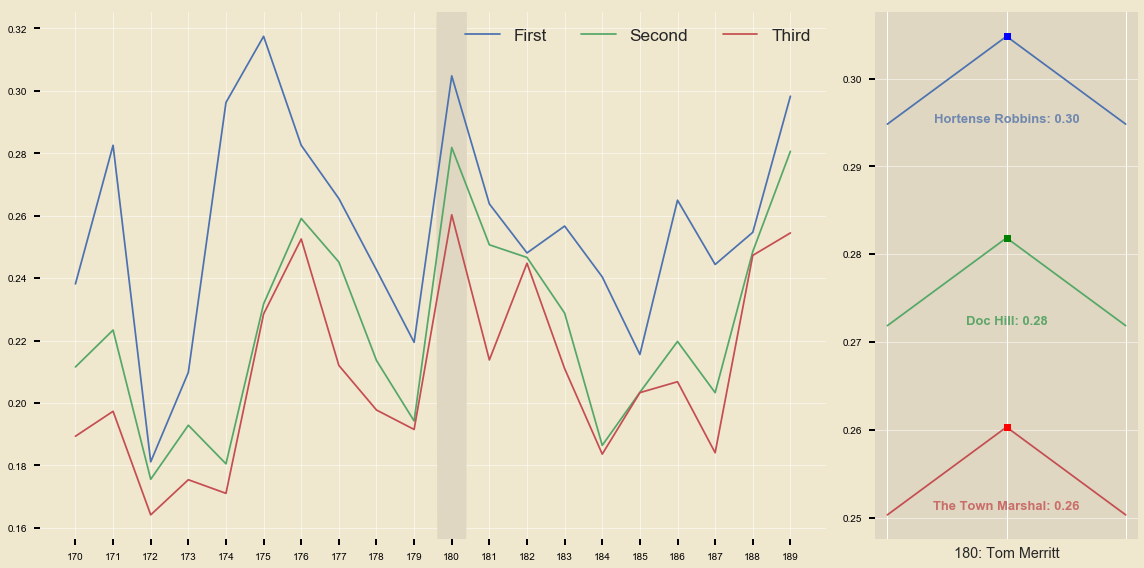

In [147]:
from matplotlib import gridspec


fig = plt.gcf()
fig.set_size_inches(16, 8)
# fig = plt.gcf(figsize=(16, 8)) 
# fig.clear()

fig.patch.set_facecolor('#f0e7cf')

gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

ax0 = plt.subplot(gs[0])

ax0.plot(n_largest_keys[170:190], scores[170:190])

circle = plt.Circle((10, 0.28), .4, color='#dfd7c1')
plt.gcf().gca().add_artist(circle)

ax0.legend(
    ['First', 'Second', 'Third'], 
    ncol=3, 
    loc='upper right',
    fontsize='xx-large'
)

ax0.tick_params(
    direction='out', 
    length=6, 
    width=2, 
    colors='black',
    grid_alpha=0.5
)

ax0.set_facecolor('#f0e7cf')


ax1 = plt.subplot(gs[1])

ax1.plot(
    ['', '180: Tom Merritt', ' '], 
    [
        [score - 0.01 for score, ind in n_largest['180']],
        [score for score, ind in n_largest['180']],
        [score - 0.01 for score, ind in n_largest['180']]
    ]
)
ax1.plot(['180: Tom Merritt'], [n_largest['180'][0][0]], 'bs')
ax1.plot(['180: Tom Merritt'], [n_largest['180'][1][0]], 'gs')
ax1.plot(['180: Tom Merritt'], [n_largest['180'][2][0]], 'rs')

# Add labels to the plot
style = dict(size=13, ha='center', fontweight='bold')

ax1.text('180: Tom Merritt', 0.295, f"Hortense Robbins: 0.30", color='#7088AF', **style)
ax1.text('180: Tom Merritt', 0.272, f"Doc Hill: 0.28", color='#5EA66A', **style)
ax1.text('180: Tom Merritt', 0.251, f"The Town Marshal: 0.26", color='#C96D6A', **style)

ax1.tick_params(
    axis='y',
    direction='out', 
    length=6, 
    width=2, 
    colors='black',
    grid_alpha=0.5
)

ax1.tick_params(
    axis='x',
    labelsize='x-large'
)

ax1.set_facecolor('#dfd7c1')

plt.tight_layout()
plt.savefig('./top_3_similar.png', facecolor='#f0e7cf');